<a href="https://colab.research.google.com/github/arvind-maurya/Timeseries/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A time series data generally contain three components:

Trend

Seasonality

Random component

A time series may contain one, two, or all the three components.

In [3]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [4]:
library(forecast)

In [7]:
invoice=read.csv("/invoice_monthly_data.csv")

In [9]:
head(invoice)

,Month.Year,tot_invoice_amt
,<chr>,<int>
1,Jan-07,141
2,Feb-07,157
3,Mar-07,185
4,Apr-07,199
5,May-07,203
6,Jun-07,189


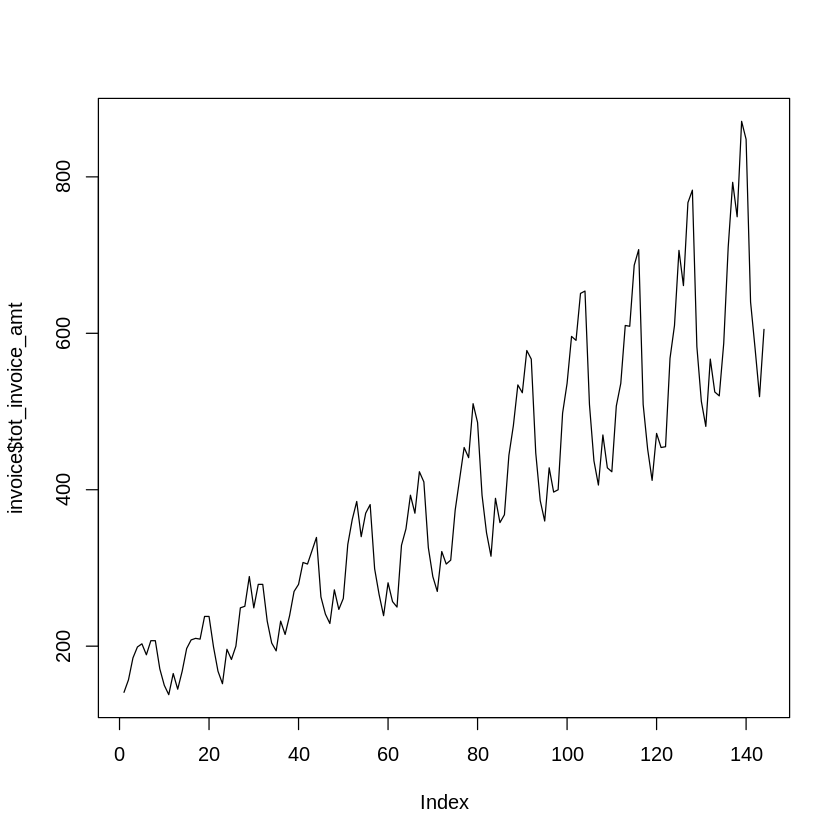

In [12]:
plot(invoice$tot_invoice_amt,type="l")

In [14]:
#Add time as a variable to capture Trend
invoice$time=seq(1:144)
head(invoice)
tail(invoice)

,Month.Year,tot_invoice_amt,time
,<chr>,<int>,<int>
1,Jan-07,141,1
2,Feb-07,157,2
3,Mar-07,185,3
4,Apr-07,199,4
5,May-07,203,5
6,Jun-07,189,6


,Month.Year,tot_invoice_amt,time
,<chr>,<int>,<int>
139,Jul-18,871,139
140,Aug-18,848,140
141,Sep-18,640,141
142,Oct-18,581,142
143,Nov-18,519,143
144,Dec-18,605,144


In [16]:
#Add month for all the year
invoice$month=rep(1:12,12)
head(invoice,12)
tail(invoice,12)

,Month.Year,tot_invoice_amt,time,month
,<chr>,<int>,<int>,<int>
1,Jan-07,141,1,1
2,Feb-07,157,2,2
3,Mar-07,185,3,3
4,Apr-07,199,4,4
5,May-07,203,5,5
6,Jun-07,189,6,6
7,Jul-07,207,7,7
8,Aug-07,207,8,8
9,Sep-07,171,9,9


,Month.Year,tot_invoice_amt,time,month
,<chr>,<int>,<int>,<int>
133,Jan-18,525,133,1
134,Feb-18,520,134,2
135,Mar-18,587,135,3
136,Apr-18,710,136,4
137,May-18,793,137,5
138,Jun-18,749,138,6
139,Jul-18,871,139,7
140,Aug-18,848,140,8
141,Sep-18,640,141,9


In [19]:
dummies=model.matrix(~as.factor(invoice$month))
invoicedata=cbind(invoice, dummies[,2:12])
invoicedata

,Month.Year,tot_invoice_amt,time,month,as.factor(invoice$month)2,as.factor(invoice$month)3,as.factor(invoice$month)4,as.factor(invoice$month)5,as.factor(invoice$month)6,as.factor(invoice$month)7,as.factor(invoice$month)8,as.factor(invoice$month)9,as.factor(invoice$month)10,as.factor(invoice$month)11,as.factor(invoice$month)12
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-07,141,1,1,0,0,0,0,0,0,0,0,0,0,0
2,Feb-07,157,2,2,1,0,0,0,0,0,0,0,0,0,0
3,Mar-07,185,3,3,0,1,0,0,0,0,0,0,0,0,0
4,Apr-07,199,4,4,0,0,1,0,0,0,0,0,0,0,0
5,May-07,203,5,5,0,0,0,1,0,0,0,0,0,0,0
6,Jun-07,189,6,6,0,0,0,0,1,0,0,0,0,0,0
7,Jul-07,207,7,7,0,0,0,0,0,1,0,0,0,0,0
8,Aug-07,207,8,8,0,0,0,0,0,0,1,0,0,0,0
9,Sep-07,171,9,9,0,0,0,0,0,0,0,1,0,0,0


In [20]:
colnames(invoicedata)=c("Date", "Sales_units", "time", "month", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")


In [23]:
invoicedata

,Date,Sales_units,time,month,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Jan-07,141,1,1,0,0,0,0,0,0,0,0,0,0,0
2,Feb-07,157,2,2,1,0,0,0,0,0,0,0,0,0,0
3,Mar-07,185,3,3,0,1,0,0,0,0,0,0,0,0,0
4,Apr-07,199,4,4,0,0,1,0,0,0,0,0,0,0,0
5,May-07,203,5,5,0,0,0,1,0,0,0,0,0,0,0
6,Jun-07,189,6,6,0,0,0,0,1,0,0,0,0,0,0
7,Jul-07,207,7,7,0,0,0,0,0,1,0,0,0,0,0
8,Aug-07,207,8,8,0,0,0,0,0,0,1,0,0,0,0
9,Sep-07,171,9,9,0,0,0,0,0,0,0,1,0,0,0
